# Proyecto Individual 2: Dataton 

**Consigna:** Con el set de datos entregado, predecir si un paquete llegará a tiempo (1) o no (0), construyendo un algoritmo de machine learning. <p><br>

**Datos seleccionados como relevantes para la construcción del algoritmo:** (Las )<p> 

*Warehouse_block:* Almacén de distribución de donde salió la orden (A a F). <br> <p> 

*Mode_of_Shipment:* Medio de transporte (Flight, Road, Ship). <br> <p> 

*Cost_of_the_Product:* Costo del producto (valor numérico entero de 96 a 310). <br> <p> 

*Product_importance:* Nivel de importancia del producto (low, medium, high). <br> <p> 

*Reached.on.Time_Y.N (Etiqueta):* Información sobre la llegada del paquete a destino (1 si llegó a tiempo, 0 si no llegó a tiempo). <br> <p><br>

**Descripción general:** Se realizó un modelo regresión logistica para predecir la variable binaria de la columna Reached.on.Time_Y.N que contiene los valores 1 (entrega a tiempo) y 0 (entrega atrasada). <p><br>






In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [47]:
data_test = pd.read_excel("/Users/vr/Desktop/Datathon-DS-3-main/E-Commerce_test.xlsx")

data_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [48]:
data_train = pd.read_excel("/Users/vr/Desktop/Datathon-DS-3-main/E-Commerce_train.xlsx")
data_train.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [49]:
### Dataframe con Variables Seleccionadas 

data_select = data_train[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Cost_of_the_Product', 'Discount_offered', 'Reached.on.Time_Y.N']]
data_test2 = data_test[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Cost_of_the_Product', 'Discount_offered']]
data_select

,Warehouse_block,Mode_of_Shipment,Product_importance,Cost_of_the_Product,Discount_offered,Reached.on.Time_Y.N
0,D,Flight,low,177,44,1
1,F,Flight,low,216,59,1
2,A,Flight,low,183,48,1
3,B,Flight,medium,176,10,1
4,C,Flight,medium,184,46,1
...,...,...,...,...,...,...
8994,D,Ship,low,217,1,1
8995,F,Ship,medium,232,3,0
8996,A,Ship,medium,260,6,0
8997,B,Ship,medium,184,5,1


Datos NA

In [10]:
na_test = data_test.isna().sum()
na_test


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [11]:
na_train = data_train.isna().sum()
na_train 

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [50]:
### Contar clases de la columna 'Reached.on.Time_Y.N'
data_train.groupby(['Reached.on.Time_Y.N'])['Reached.on.Time_Y.N'].count()

Reached.on.Time_Y.N
0    3280
1    5719
Name: Reached.on.Time_Y.N, dtype: int64

In [51]:
### BALANCEAR DATOS
## Sub-muestreo aleatorio de datos para mantener aproximadamente la distribución origial del set completo, igualando el N de la clase mayoritaria (1) a la minoritaria (0)

from sklearn.utils import resample

data_select

# Separar clase mayoritaria y minoritaria en dataframes distintos
df_majority = data_select[data_select['Reached.on.Time_Y.N']==1]

df_minority = data_select[data_select['Reached.on.Time_Y.N']==0]
 
# Reducción de la clase mayoritaria
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # muestreo con/sin remplazo 
                                 n_samples=3280,     # cantidad de observaciones
                                 random_state=123) # resultados reproducibles

# Combinar la clase mayoritaria y minoritaria en un dataframe
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Comprobar el n de ambas clases 
df_downsampled['Reached.on.Time_Y.N'].value_counts()


 

1    3280
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

In [52]:
#### Transformación de variables categóricas con el método One-Hot-Encoding

dummy_warehouse = pd.get_dummies(df_downsampled['Warehouse_block'], prefix="warehouse")
dummy_shipment = pd.get_dummies(df_downsampled['Mode_of_Shipment'], prefix="shipment")
dummy_productimp = pd.get_dummies(df_downsampled['Product_importance'], prefix="productimp")

In [53]:
### Elimnar colummas transformadas

df_downsampled = df_downsampled.drop(['Warehouse_block'], axis= 1)
df_downsampled = df_downsampled.drop(['Mode_of_Shipment'], axis= 1)
df_downsampled = df_downsampled.drop(['Product_importance'], axis= 1)


In [54]:
### Concatenar dataframes dummy 

data_select2 = pd.concat([df_downsampled, dummy_shipment, dummy_productimp, dummy_warehouse],axis=1)
data_select2

,Cost_of_the_Product,Discount_offered,Reached.on.Time_Y.N,shipment_Flight,shipment_Road,shipment_Ship,productimp_high,productimp_low,productimp_medium,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F
204,155,23,1,0,0,1,0,1,0,0,0,0,1,0
1591,252,11,1,0,0,1,0,1,0,0,0,0,0,1
6969,192,2,1,0,1,0,0,1,0,0,1,0,0,0
2070,272,63,1,1,0,0,0,0,1,0,0,0,1,0
2962,208,39,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,236,9,0,0,0,1,1,0,0,0,1,0,0,0
8993,260,8,0,0,0,1,0,1,0,0,0,0,0,1
8995,232,3,0,0,0,1,0,0,1,0,0,0,0,1
8996,260,6,0,0,0,1,0,0,1,1,0,0,0,0


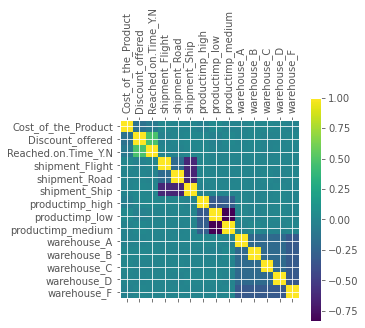

In [55]:
### Análisis de correlación entre todos los datos seleccionados, en bruto

data_select2.corr()
plt.matshow(data_select2.corr())
plt.xticks(range(len(data_select2.columns)), data_select2.columns)
plt.yticks(range(len(data_select2.columns)), data_select2.columns)
plt.colorbar()
plt.xticks(rotation=90)
plt.show()


Las variables 'Discount_offered' y 

In [39]:
data_select2.corr()

,Cost_of_the_Product,Discount_offered,Reached.on.Time_Y.N,shipment_Flight,shipment_Road,shipment_Ship,productimp_high,productimp_low,productimp_medium,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F
Cost_of_the_Product,1.000000,-0.140457,-0.085400,0.009888,0.002818,-0.010006,0.020434,0.005491,-0.014528,0.027360,0.010855,-0.028835,0.004424,-0.010321
Discount_offered,-0.140457,1.000000,0.472731,-0.035545,-0.014709,0.039606,-0.089452,0.022519,0.017002,0.002885,0.044876,-0.026087,0.048242,-0.053352
Reached.on.Time_Y.N,-0.085400,0.472731,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipment_Flight,0.009888,-0.035545,NaN,1.000000,-0.197605,-0.633402,0.040650,-0.000498,-0.018528,0.003815,0.000199,-0.003417,-0.000397,-0.000157
shipment_Road,0.002818,-0.014709,NaN,-0.197605,1.000000,-0.633402,0.011718,-0.000498,-0.004984,0.000199,0.003815,0.003815,-0.004009,-0.003014
shipment_Ship,-0.010006,0.039606,NaN,-0.633402,-0.633402,1.000000,-0.041338,0.000787,0.018560,-0.003168,-0.003168,-0.000314,0.003478,0.002504
productimp_high,0.020434,-0.089452,NaN,0.040650,0.011718,-0.041338,1.000000,-0.244296,-0.222517,0.010681,-0.023912,0.022212,-0.006939,-0.001606
productimp_low,0.005491,0.022519,NaN,-0.000498,-0.000498,0.000787,-0.244296,1.000000,-0.891029,0.027735,0.008943,-0.023271,-0.024569,0.008842
productimp_medium,-0.014528,0.017002,NaN,-0.018528,-0.004984,0.018560,-0.222517,-0.891029,1.000000,-0.032885,0.002202,0.012998,0.027950,-0.008138
warehouse_A,0.027360,0.002885,NaN,0.003815,0.000199,-0.003168,0.010681,0.027735,-0.032885,1.000000,-0.199760,-0.199760,-0.200120,-0.316157


REVISAR DISTRIBUCIÓN DE CADA UNO Y CAMBIO DE ESCALA SI ES NECESARIO

In [19]:
data_select2.describe()

,Cost_of_the_Product,Discount_offered,Reached.on.Time_Y.N,shipment_Flight,shipment_Road,shipment_Ship,productimp_high,productimp_low,productimp_medium,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F
count,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000
mean,209.753811,13.099085,0.500000,0.158232,0.162348,0.679421,0.091768,0.476982,0.431250,0.171189,0.166463,0.162043,0.166921,0.333384
std,48.361340,16.008362,0.500038,0.364986,0.368797,0.466735,0.288721,0.499508,0.495289,0.376703,0.372524,0.368518,0.372934,0.471458
min,96.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212.000000,7.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,251.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,310.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
## DATOS PARA EL MODELO
from sklearn import datasets

X =  data_select2.loc[:, data_select2.columns != 'Reached.on.Time_Y.N']
## ETIQUETA
Y = data_select2[['Reached.on.Time_Y.N']]

In [57]:
#### IMPLEMENTACIÓN REGRESIÓN LOGISTICA 

from sklearn.model_selection import train_test_split

## separar datos de "entrenamiento" y "prueba" para probar los algoritmos

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [58]:
### ESCALAR LOS DATOS 

from sklearn.preprocessing import MinMaxScaler

escalar = MinMaxScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


In [59]:
### DEFINIR ALGORITMO A UTILIZAR

from sklearn.linear_model import LogisticRegression

algoritmo = LogisticRegression()

### Entrenar modelo 

algoritmo.fit(X_train, y_train)

## Realizar predicción 
y_pred = algoritmo.predict(X_test)

## Array a Dataframe con la predicción en la columna 'pred'
pred = pd.DataFrame(y_pred, columns= ['pred'])
pred


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,pred
0,0
1,0
2,0
3,0
4,0
...,...
1307,0
1308,0
1309,1
1310,1


In [24]:
### REALIZAR MATRIZ DE CONFUSIÓN PARA VERIFICAR LA PREDICCIÓN 

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print(matriz) 

[[590  51]
 [330 341]]


In [25]:
## CALCULAR PRECISIÓN

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(precision)

0.8698979591836735


In [26]:
### CALCULAR EXACTITUD DEL MODELO 

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7096036585365854


In [27]:
### CALCULAR SENSIBILIDAD DEL MODELO 

from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print(sensibilidad)

0.5081967213114754


In [28]:
### CURVA ROC

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)


0.7143167693920871


Análisis para los datos de E-Commerce_test.xlsx
- Se realiza el mismo procedimiento descrito anteriormente

In [60]:
data_test2

dummy_warehouse = pd.get_dummies(data_test2['Warehouse_block'], prefix="warehouse")
dummy_shipment = pd.get_dummies(data_test2['Mode_of_Shipment'], prefix="shipment")
dummy_productimp = pd.get_dummies(data_test2['Product_importance'], prefix="productimp")

In [61]:
data_test2 = data_test2.drop(['Warehouse_block'], axis= 1)
data_test2 = data_test2.drop(['Mode_of_Shipment'], axis= 1)
data_test2 = data_test2.drop(['Product_importance'], axis= 1)

In [62]:
data_test_end = pd.concat([data_test2, dummy_shipment, dummy_productimp, dummy_warehouse],axis=1)
data_test_end

,Cost_of_the_Product,Discount_offered,shipment_Flight,shipment_Road,shipment_Ship,productimp_high,productimp_low,productimp_medium,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F
0,189,10,0,0,1,0,0,1,0,0,0,0,1
1,150,9,0,0,1,1,0,0,0,0,0,1,0
2,200,3,0,0,1,0,1,0,0,0,0,0,1
3,133,1,0,0,1,0,0,1,1,0,0,0,0
4,260,4,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,252,1,0,0,1,0,0,1,1,0,0,0,0
1996,232,6,0,0,1,0,0,1,0,1,0,0,0
1997,242,4,0,0,1,0,1,0,0,0,1,0,0
1998,223,2,0,0,1,0,0,1,0,0,0,0,1


In [64]:
from sklearn.preprocessing import MinMaxScaler

X_test_2 = data_test_end

escalar = MinMaxScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test_2)

In [68]:
y_pred = algoritmo.predict(X_test)

pred = pd.DataFrame(y_pred, columns= ['pred'])
pred
print(pred.to_csv('amylovora.csv', sep='\t', index=False))

None
